# Hiearchical peak valley anlaysis
In this notebook we will explore the analysis of peaks and valleys using a tool that we developed. The herarichcal peak valley analysis.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
noise = np.array([-1,1]*50)*0.2


In [15]:
x = np.linspace(0,1,100)
Amplitude = 0.3
Frequency = 5
Phase = 0
# We compute the sinusoidal function
y = Amplitude*np.sin(x*2*np.pi*Frequency+Phase)
y[20:30] = y[20:30]*3
y[60:70] = y[60:70]*4

In [16]:
x2 = np.linspace(0,1,100)
Amplitude2 = 0.1
Frequency2 = 15
Phase2 = 0
# We compute the sinusoidal function
y2 = Amplitude*np.sin(x2*2*np.pi*Frequency2+Phase2)


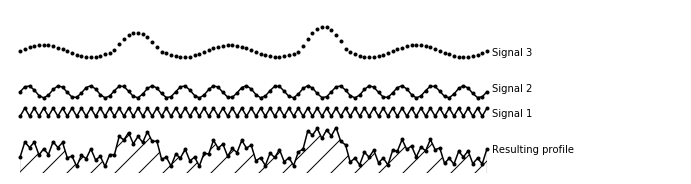

In [17]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111,)
plt.rcParams['svg.fonttype'] = 'none'
mean, sigma = 2, 0.5 # mean and standard deviation
points = 300
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_ylim(-1,7)
ax.set_xlim(-2,140)
tot_prof = noise+y+y2
ax.plot(tot_prof,'.',linestyle='-',color='k')
ax.fill_between(range(len(tot_prof)), -1, tot_prof, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)
ax.plot(noise + 2,'.',linestyle='-',color='k')
ax.plot(y2 + 3,'.',linestyle='-',color='k')
ax.plot(y +5,'.',color='k')

ax.text(s='Resulting profile',x=100,y=0,ha='left')
ax.text(s='Signal 1',x=100,y=1.8,ha='left')
ax.text(s='Signal 2',x=100,y=3,ha='left')
ax.text(s='Signal 3',x=100,y=4.8,ha='left')
fig.savefig("Signals.svg")

In [18]:
plt.scatter(range(len(g)), g)

NameError: name 'g' is not defined

In [19]:
def findpeaks(profile,pindexes=None):
    indx = []
    heights = []
    tot_profile = np.array(profile)
    z = 0
    if pindexes is not None:
        z = -1
    arr = np.concatenate(([tot_profile[0]+z],tot_profile,[tot_profile[-1]+z]))
    for ix,h in enumerate(arr[1:-1]):
        if h > arr[ix] and h > arr[ix+2]:
            heights.append(h)
            indx.append(ix+1)
    indx = np.array(indx)
    if pindexes is not None: 
        indx = pindexes[indx-1]
    return indx, np.array(heights)

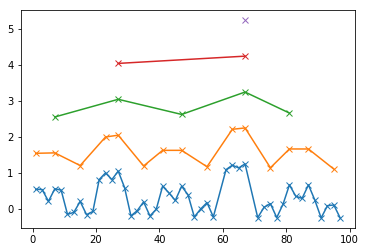

In [21]:
indx1,heights1 = findpeaks(tot_prof)
plt.plot(indx1-1,heights1,marker='x')
indx2,heights2 = findpeaks(heights1,indx1)
plt.plot(indx2-1,heights2+1,marker='x')
indx3,heights3 = findpeaks(heights2,indx2)
plt.plot(indx3-1,heights3+2,marker='x')
indx4,heights4 = findpeaks(heights3,indx3)
plt.plot(indx4-1,heights4+3,marker='x')
indx5,heights5 = findpeaks(heights4,indx4)
plt.plot(indx5-1,heights5+4,marker='x')

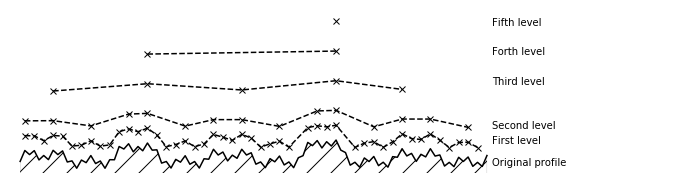

In [22]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111,)
plt.rcParams['svg.fonttype'] = 'none'
mean, sigma = 2, 0.5 # mean and standard deviation
points = 300



ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_ylim(-1,10)
ax.set_xlim(-2,140)

ax.plot(range(len(tot_prof)),tot_prof,color='k')
ax.fill_between(range(len(tot_prof)), -1, tot_prof, facecolor="none", hatch="/", edgecolor="k", linewidth=0.1)
ax.plot(indx1-1,heights1+1,marker='x',linestyle='--',color='k')
ax.plot(indx2-1,heights2+2,marker='x',linestyle='--',color='k')
ax.plot(indx3-1,heights3+4,marker='x',linestyle='--',color='k')
ax.plot(indx4-1,heights4+6,marker='x',linestyle='--',color='k')
ax.plot(indx5-1,heights5+8,marker='x',linestyle='--',color='k')
ax.text(s='Original profile',x=100,y=-0.5,ha='left')
ax.text(s='First level',x=100,y=1,ha='left')
ax.text(s='Second level',x=100,y=2,ha='left')
ax.text(s='Third level',x=100,y=5,ha='left')
ax.text(s='Forth level',x=100,y=7,ha='left')
ax.text(s='Fifth level',x=100,y=9,ha='left')
fig.savefig("HPVA_2D_b.svg")

In [9]:
from micropro import SCA,ns

/home/opdate/Documents/micropro/micropro/config.json


Test

In [10]:
import os

In [11]:
path = os.path.join(os.getcwd(),'Data','PanelLay75mm','PanelLay75mm')
print(path)

/home/opdate/Desktop/phdthesis/jupyter notebook/Data/PanelLay75mm/PanelLay75mm


In [12]:
surf = ns(path)
surf.fliprows()

WORKING ON:
/home/opdate/Desktop/phdthesis/jupyter notebook/Data/PanelLay75mm/PanelLay75mm
20.0
Num. rows: 441, Num. Cols: 401
Size expected: 176841, Size retrieved: 176841
Freq. from column: 200.5 Frq.: 200.0 CCD: 400.0
Retrieved rows: 441  cols: 401


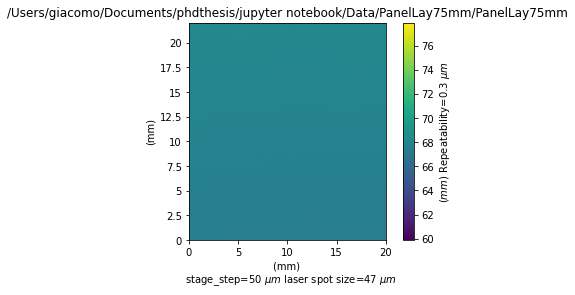

In [13]:
surf.plot()

X axis inclination  -0.12971049031929935 degrees
Y axis inclination  -2.37667834206427 degrees


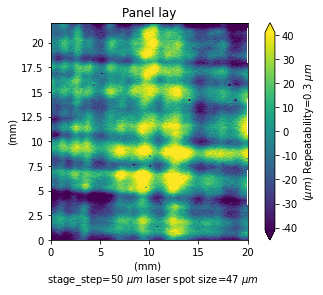

In [14]:
surf.mfilter()
surf.subtractplane()
surf.name = "Panel lay"
surf.plot(unit='micron')

In [15]:
surf.plot(unit='micron',save=True)

In [16]:
sca = SCA.SCA(surf)
sca.run()

##PERFORMING ANALYSIS ON MAXIMUMS... 
Trasposing the array...=============================---------] 85.7% ...C: 6 H
Locating full peaks..===============================---------] 85.7% ...C: 6 V
##PERFORMING ANALYSIS ON MINIMUMS... 
Trasposing the array...=====================-----------------] 71.4% ...C: 5 H
Locating full peaks..=======================-----------------] 71.4% ...C: 5 V
##COMBINIG THE RESULTS...


Now we plot all the horizontal and vertical components peaks and valleys.

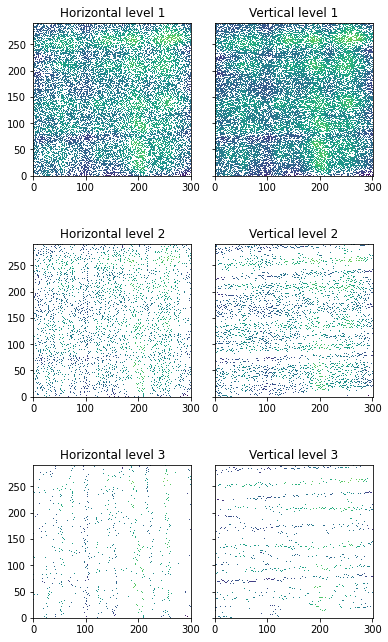

In [17]:
number_of_levels=3
fig  = plt.figure(figsize=(5.5,9.36))
count = 1
sca.smin.h_components
for i in range(number_of_levels):
      ax = fig.add_subplot(number_of_levels*100+20+count)
      g = ax.pcolormesh(sca.h_components[i][:-150,:-100],rasterized=True)
      ax.set_title("Horizontal level %s" %(i+1))
      ax.axes.set_aspect('equal')
      count +=1
      ax2 = fig.add_subplot(number_of_levels*100+20+count)
      g2 = ax2.pcolormesh(sca.v_components[i][:-150,:-100],rasterized=True)
      ax2.set_title("Vertical level %s" %(i+1))
      ax2.set_yticklabels([])
      ax2.axes.set_aspect('equal')
      count +=1

plt.tight_layout()
plt.savefig('HPVA_lay.pdf',dpi=300)

We can decide to plot only the peaks selecting smax.

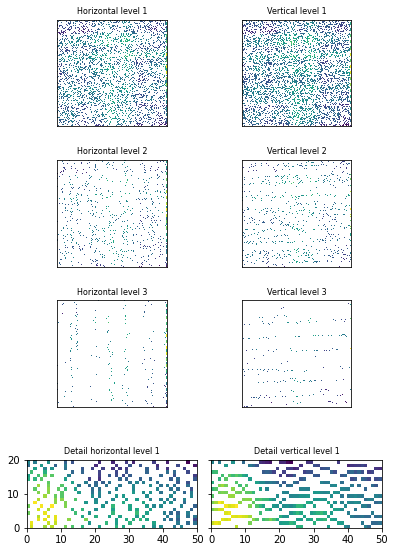

In [18]:
number_of_levels=3
fig  = plt.figure(figsize=(5.5,8))
count = 1
sca.smin.h_components
for i in range(number_of_levels):
      ax = fig.add_subplot(number_of_levels*100+220+count)
      g = ax.pcolormesh(sca.smax.h_components[i][:-50,:],rasterized=True)
      ax.set_title("Horizontal level %s" %(i+1),fontsize=8)
      ax.axes.set_aspect('equal')
      ax.axes.get_xaxis().set_visible(False)
      ax.axes.get_yaxis().set_visible(False)
      ax.set_ylabel("Horizontal level %s" %(i+1))

      count +=1
      ax2 = fig.add_subplot(number_of_levels*100+220+count)
      g2 = ax2.pcolormesh(sca.smax.v_components[i][:-50,:],rasterized=True)
      ax2.set_title("Vertical level %s" %(i+1),fontsize=8)
      ax2.set_ylabel("Vertical level %s" %(i+1),fontsize=8)
      ax2.axes.get_xaxis().set_visible(False)
      ax2.axes.get_yaxis().set_visible(False)
      ax2.axes.set_aspect('equal')
      count +=1

ax = fig.add_subplot(number_of_levels*100+220+count)
g = ax.pcolormesh(sca.smax.h_components[0][50:70,50:100],rasterized=True)
ax.set_title("Detail horizontal level 1",fontsize=8 )
ax.axes.set_aspect('equal')
count +=1
ax2 = fig.add_subplot(number_of_levels*100+220+count)
g2 = ax2.pcolormesh(sca.smax.v_components[0][50:70,50:100],rasterized=True)
ax2.set_title("Detail vertical level 1",fontsize=8)
ax2.set_yticklabels([])
ax2.axes.set_aspect('equal')
count +=1
plt.tight_layout()
fig.subplots_adjust(bottom=-0.2)
plt.savefig('HPVA_lay.pdf',dpi=300)

NameError: name 'h' is not defined

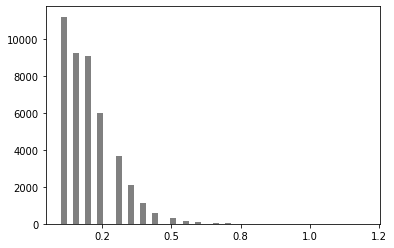

In [19]:
import itertools
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)


def units(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x*surf.parameters.stage_step)

formatter = FuncFormatter(units)
ji = sca.smax.get_spacing_arrays(sca.smin.h_components)

fig, ax = plt.subplots()

ax.hist(np.concatenate([i[0] for i in ji[0]]),bins=50,color='gray')
ax.xaxis.set_major_formatter(formatter)
ax
h.ravel()

In [80]:
surf.parameters.stage_step

0.05

(array([1.1217e+04, 0.0000e+00, 9.2330e+03, 0.0000e+00, 9.0730e+03,
        0.0000e+00, 5.9790e+03, 0.0000e+00, 0.0000e+00, 3.6860e+03,
        0.0000e+00, 2.1190e+03, 0.0000e+00, 1.1020e+03, 0.0000e+00,
        5.9300e+02, 0.0000e+00, 0.0000e+00, 2.9700e+02, 0.0000e+00,
        1.4100e+02, 0.0000e+00, 8.1000e+01, 0.0000e+00, 0.0000e+00,
        4.1000e+01, 0.0000e+00, 1.7000e+01, 0.0000e+00, 1.3000e+01,
        0.0000e+00, 8.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 2.  ,  2.44,  2.88,  3.32,  3.76,  4.2 ,  4.64,  5.08,  5.52,
         5.96,  6.4 ,  6.84,  7.28,  7.72,  8.16,  8.6 ,  9.04,  9.48,
         9.92, 10.36, 10.8 , 11.24, 11.68, 12.12, 12.56, 13.  , 13.44,
        13.88, 14.32, 14.76, 15.2 , 15.64, 16.08, 16.52, 16.96, 17.4 ,
        17.84, 18.28, 18.72, 19.16

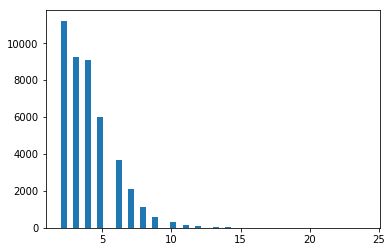

In [78]:
plt.

In [ ]:
# we compute manually the spacing of the vertical level
alllevs = []
row,cols = sca.smin.v_components[0].shape
for l in range(4):
    spacing = []
    for col in range(cols):
        spacing.append(np.diff(np.where(~sca.smin.v_components[l].mask[:,col])[0]))
    alllevs.append(spacing)

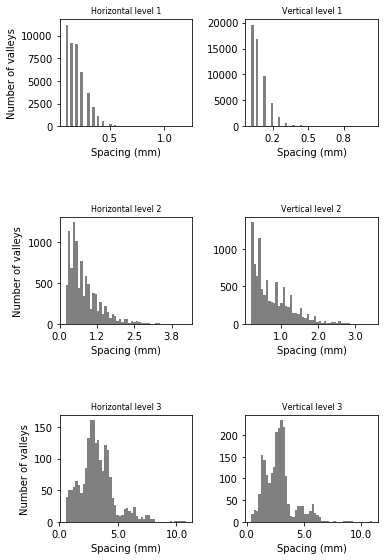

In [149]:
number_of_levels=3
fig  = plt.figure(figsize=(5.5,8))
count = 1
sca.smin.h_components
sh = sca.smin.get_spacing_arrays(sca.smin.h_components)
sv = alllevs
for i in range(number_of_levels):
      ax = fig.add_subplot(number_of_levels*100+220+count)
      ax.hist(np.concatenate([j[0] for j in sh[i]]),bins=50,color='gray')
      ax.xaxis.set_major_formatter(formatter)
      ax.set_title("Horizontal level %s" %(i+1),fontsize=8)
      ax.set_ylabel("Number of valleys")
      ax.set_xlabel("Spacing (mm)")

      count +=1
      ax2 = fig.add_subplot(number_of_levels*100+220+count)
      ax2.hist(np.concatenate(sv[i]),color='gray',bins=50)
      ax2.xaxis.set_major_formatter(formatter)
      ax2.set_title("Vertical level %s" %(i+1),fontsize=8)
      ax2.set_xlabel("Spacing (mm)")
      count +=1


plt.tight_layout()
fig.subplots_adjust(bottom=-0.6)
plt.savefig('HPVA_lay_spacing.pdf',dpi=300)

(array([2.039e+03, 1.790e+02, 6.200e+01, 1.800e+01, 1.400e+01, 1.000e+01,
        7.000e+00, 2.000e+00, 4.000e+00, 1.000e+00]),
 array([  1.,  34.,  67., 100., 133., 166., 199., 232., 265., 298., 331.]),
 <a list of 10 Patch objects>)

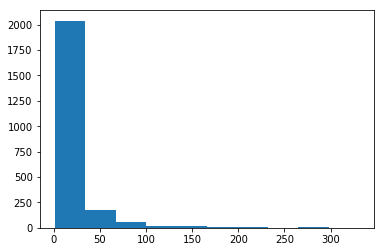

In [94]:
plt.hist(np.concatenate([j[0] for j in sv[2]]))

In [95]:
sv[2]

[array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([], shape=(1, 0), dtype=int64),
 array([[22,  1]]),
 array([[10]]),
 array([[7]]),
 array([], shape=(1, 0), dtype=int64),
 array([[ 1, 79,  1,  1]]),
 array([[1, 2]]),
 array([[ 5, 10, 84, 13,  1,  1]]),
 array([[ 5,  1,  8,  1,  9, 86,  5]]),
 array([[ 8,  7,  5, 17]]),
 array([[4, 4]]),
 array([[112]]),
 array([[ 82,   2, 207,  44,  47]]),
 array([[130,   1, 154,   1,  33]]),
 array([[23,  4, 24, 92,  6]]),
 array([[ 4, 65,  1, 17, 41,  5]])

In [110]:
v= sca.smin.v_components[0]
vi = v[0][~v.mask[0]]
v.mask[:,2]

array([ True,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
        True,  True,

In [116]:

np.diff(np.where(~sca.smin.v_components[4].mask[:,0])[0])

array([], dtype=int64)

In [138]:
alllevs = []
row,cols = sca.smin.v_components[0].shape
for l in range(4):
    spacing = []
    for col in range(cols):
        spacing.append(np.diff(np.where(~sca.smin.v_components[l].mask[:,col])[0]))
    alllevs.append(spacing)

(array([12., 21., 47., 16., 22., 50., 17.,  3.,  0., 29.]),
 array([ 45. ,  69.3,  93.6, 117.9, 142.2, 166.5, 190.8, 215.1, 239.4,
        263.7, 288. ]),
 <a list of 10 Patch objects>)

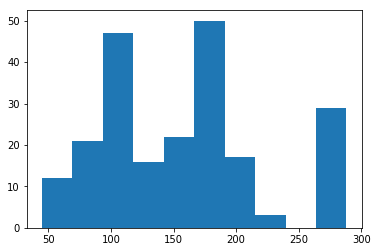

In [139]:
plt.hist(np.concatenate(spacing))

In [142]:
alllevs[0]

[array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([ 2,  3,  3,  2,  3,  2,  3,  5,  2,  4,  2,  4,  2,  4,  4,  4,  2,
         3,  2,  2,  4,  5,  3,  2,  7,  4,  4,  5,  7,  7,  2,  4,  3,  2,
         2,  4,  2,  3,  2,  7,  4,  4,  2,  2,  2,  3,  3,  6,  2,  2,  6,
         2,  2,  2,  2,  3,  2,  

In [134]:
h

[]